In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

sns.set_theme(style='darkgrid')
df_train = pd.read_csv('../input/titanic/train.csv')
df_test = pd.read_csv('../input/titanic/test.csv')

print(df_train.shape)
print(df_test.shape)

(891, 12)
(418, 11)


In [3]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='Embarked', ylabel='count'>

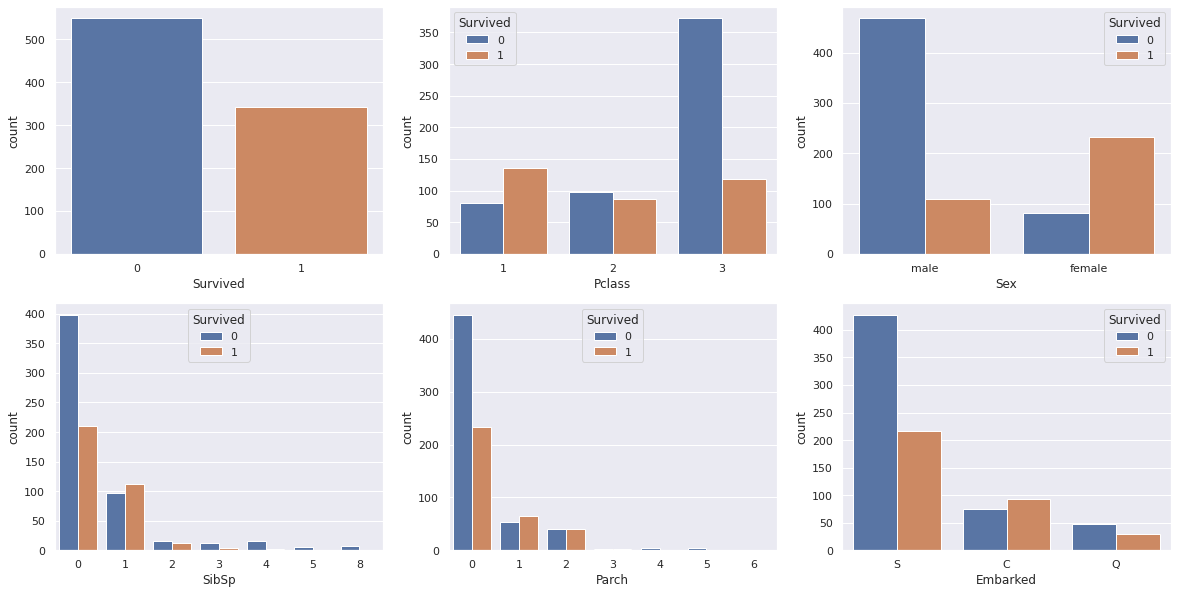

In [5]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

sns.countplot(ax=axs[0,0], data=df_train, x='Survived')
sns.countplot(ax=axs[0,1], data=df_train, x='Pclass', hue='Survived')
sns.countplot(ax=axs[0,2], data=df_train, x='Sex', hue='Survived')
sns.countplot(ax=axs[1,0], data=df_train, x='SibSp', hue='Survived')
sns.countplot(ax=axs[1,1], data=df_train, x='Parch', hue='Survived')
sns.countplot(ax=axs[1,2], data=df_train, x='Embarked', hue='Survived')

In [6]:
# Check missing value
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# Extract 'Title' from 'Name'
df_train['Title'] = df_train['Name'].str.extract('([A-Za-z]+)\.', expand=False)
df_test['Title'] = df_test['Name'].str.extract('([A-Za-z]+)\.', expand=False)
pd.crosstab(df_train['Title'], df_train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [8]:
# Mapping
df_train['Title'] = df_train['Title'].replace(['Capt', 'Col', 'Countess', 'Don', 'Dr', 'Jonkheer', 'Major', 'Mlle', 'Mme', 'Rev'], 'Other')
df_train['Title'] = df_train['Title'].replace(['Lady', 'Ms'], 'Miss')
df_train['Title'] = df_train['Title'].replace('Sir', 'Mr')

df_test['Title'] = df_test['Title'].replace(['Capt', 'Col', 'Countess', 'Don', 'Dr', 'Jonkheer', 'Major', 'Mlle', 'Mme', 'Rev'], 'Other')
df_test['Title'] = df_test['Title'].replace(['Lady', 'Ms'], 'Miss')
df_test['Title'] = df_test['Title'].replace('Sir', 'Mr')

encoder = LabelEncoder()
df_train['Title'] = encoder.fit_transform(df_train['Title'])
df_train['Title'] = df_train['Title'].fillna(0)
df_test['Title'] = encoder.fit_transform(df_test['Title'])
df_test['Title'] = df_test['Title'].fillna(0)

df_train['Sex'] = encoder.fit_transform(df_train['Sex'])
df_test['Sex'] = encoder.fit_transform(df_test['Sex'])

In [9]:
# Fill missing value of 'Embarked' and map
df_train['Embarked'] = df_train['Embarked'].fillna('S')
df_train['Embarked'] = encoder.fit_transform(df_train['Embarked'])

df_test['Embarked'] = df_test['Embarked'].fillna('S')
df_test['Embarked'] = encoder.fit_transform(df_test['Embarked'])

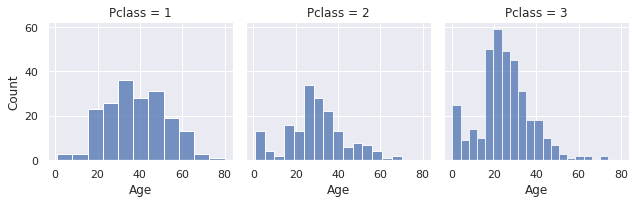

In [10]:
# Plot the relationship between 'Pclass' and 'Age'
grid = sns.FacetGrid(data=df_train, col='Pclass', height=3)
grid.map(sns.histplot, 'Age')

In [11]:
# Fill the null values of 'Age' with median 'Age' value in the specific 'Pclass'
# Split 'Age' into 5 groups and map
df_train.loc[(df_train['Age'].isnull() == True) & (df_train['Pclass'] == 3), 'Age'] = df_train.loc[df_train['Pclass'] == 3, 'Age'].median()
df_train.loc[(df_train['Age'].isnull() == True) & (df_train['Pclass'] == 2), 'Age'] = df_train.loc[df_train['Pclass'] == 2, 'Age'].median()
df_train.loc[(df_train['Age'].isnull() == True) & (df_train['Pclass'] == 1), 'Age'] = df_train.loc[df_train['Pclass'] == 1, 'Age'].median()

df_test.loc[(df_test['Age'].isnull() == True) & (df_test['Pclass'] == 3), 'Age'] = df_test.loc[df_test['Pclass'] == 3, 'Age'].median()
df_test.loc[(df_test['Age'].isnull() == True) & (df_test['Pclass'] == 2), 'Age'] = df_test.loc[df_test['Pclass'] == 2, 'Age'].median()
df_test.loc[(df_test['Age'].isnull() == True) & (df_test['Pclass'] == 1), 'Age'] = df_test.loc[df_test['Pclass'] == 1, 'Age'].median()

df_train['Age_bin'] = pd.cut(df_train['Age'], bins=[0, 15, 30, 45, 65, 90])
df_train['Age_bin'] = encoder.fit_transform(df_train['Age_bin'])

df_test['Age_bin'] = pd.cut(df_test['Age'], bins=[0, 15, 30, 45, 65, 90])
df_test['Age_bin'] = encoder.fit_transform(df_test['Age_bin'])

<AxesSubplot:xlabel='PassengerId', ylabel='Fare'>

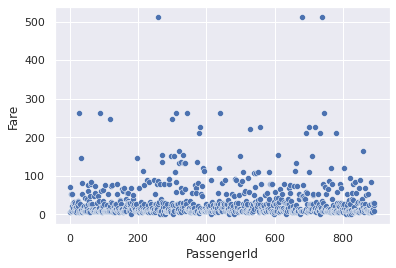

In [12]:
# Check outliers of 'Fare'
sns.scatterplot(data=df_train, x='PassengerId', y='Fare')

In [13]:
# Since all three outliers are in 'Pclass' 1, replace the outliers of 'Fare' with mean value of 'Fare' in 'Pclass' 1
outlier_index = df_train.loc[df_train['Fare'] > 500].index
df_train.loc[df_train['Fare'] > 500, 'Fare'] = df_train.loc[df_train['Pclass'] == 1, 'Fare'].mean()
df_train.iloc[outlier_index]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_bin
258,259,1,1,"Ward, Miss. Anna",0,35.0,0,0,PC 17755,84.154687,NaN,0,1,2
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",1,36.0,0,1,PC 17755,84.154687,B51 B53 B55,0,2,2
737,738,1,1,"Lesurer, Mr. Gustave J",1,35.0,0,0,PC 17755,84.154687,B101,0,2,2


In [14]:
# Fill null value of 'Fare' with median value and  take log on 'Fare'
df_train['Fare'] = df_train['Fare'].fillna(df_train['Fare'].dropna().median())
df_train['Log_Fare'] = df_train['Fare'].apply(lambda x: np.log(x) if x > 0 else 0)

df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].dropna().median())
df_test['Log_Fare'] = df_test['Fare'].apply(lambda x: np.log(x) if x > 0 else 0)

In [15]:
# Create 'Family_size' and 'Alone' feature
df_train['Family_size'] = df_train['SibSp']+df_train['Parch']+1
df_train['Alone'] = 0
df_train.loc[df_train['Family_size'] == 1 , 'Alone'] = 1

df_test['Family_size'] = df_test['SibSp']+df_train['Parch']+1
df_test['Alone'] = 0
df_test.loc[df_test['Family_size'] == 1 , 'Alone'] = 1

<AxesSubplot:xlabel='Alone', ylabel='count'>

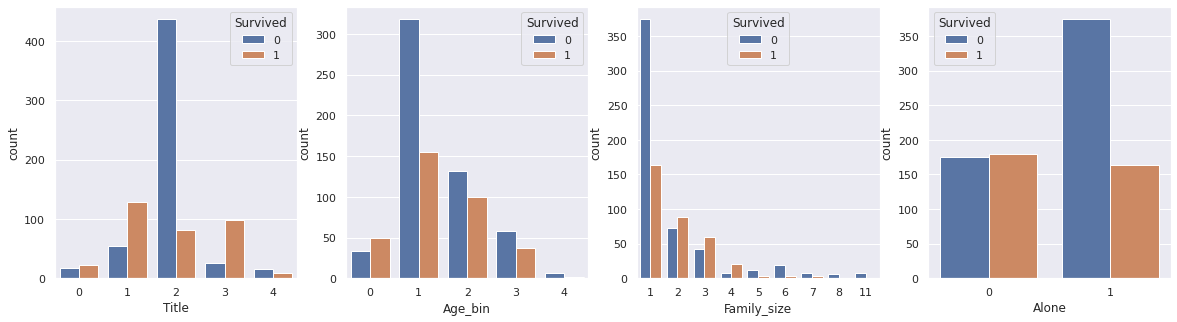

In [16]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

sns.countplot(ax=axs[0], data=df_train, x='Title', hue='Survived')
sns.countplot(ax=axs[1], data=df_train, x='Age_bin', hue='Survived')
sns.countplot(ax=axs[2], data=df_train, x='Family_size', hue='Survived')
sns.countplot(ax=axs[3], data=df_train, x='Alone', hue='Survived')

In [17]:
# Drop some columns
df_train = df_train.drop(['PassengerId', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Family_size'], axis=1)
df_test = df_test.drop(['Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Family_size'], axis=1)

In [18]:
df_train

,Survived,Pclass,Sex,Embarked,Title,Age_bin,Log_Fare,Alone
0,0,3,1,2,2,1,1.981001,0
1,1,1,0,0,3,2,4.266662,0
2,1,3,0,2,1,1,2.070022,1
3,1,1,0,2,3,2,3.972177,0
4,0,3,1,2,2,2,2.085672,1
...,...,...,...,...,...,...,...,...
886,0,2,1,2,4,1,2.564949,1
887,1,1,0,2,1,1,3.401197,1
888,0,3,0,2,1,1,3.154870,0
889,1,1,1,0,2,1,3.401197,1


In [19]:
df_test

,PassengerId,Pclass,Sex,Embarked,Title,Age_bin,Log_Fare,Alone
0,892,3,1,1,3,2,2.057860,1
1,893,3,0,2,4,3,1.945910,0
2,894,2,1,1,3,3,2.270836,1
3,895,3,1,2,3,1,2.159003,1
4,896,3,0,2,4,1,2.508582,0
...,...,...,...,...,...,...,...,...
413,1305,3,1,2,3,1,2.085672,1
414,1306,1,0,0,0,2,4.690430,1
415,1307,3,1,2,3,2,1.981001,1
416,1308,3,1,2,3,1,2.085672,0


In [20]:
from sklearn.model_selection import train_test_split

X = df_train.drop('Survived', axis=1)
y = df_train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((623, 7), (268, 7), (623,), (268,))

In [21]:
# Modeling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV


knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
nb = GaussianNB()
lr = LogisticRegression(solver='liblinear')
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
svc = SVC()
nn = MLPClassifier()

cv = KFold(n_splits=10, shuffle=True, random_state=123)

knn_score = round(cross_val_score(knn, X_train, y_train, cv=cv, scoring='accuracy').mean(), 4)
dt_score = round(cross_val_score(dt, X_train, y_train, cv=cv, scoring='accuracy').mean(), 4)
nb_score = round(cross_val_score(nb, X_train, y_train, cv=cv, scoring='accuracy').mean(), 4)
lr_score = round(cross_val_score(lr, X_train, y_train, cv=cv, scoring='accuracy').mean(), 4)
rf_score = round(cross_val_score(rf, X_train, y_train, cv=cv, scoring='accuracy').mean(), 4)
gb_score = round(cross_val_score(gb, X_train, y_train, cv=cv, scoring='accuracy').mean(), 4)
svc_score = round(cross_val_score(svc, X_train, y_train, cv=cv, scoring='accuracy').mean(), 4)
nn_score = round(cross_val_score(nn, X_train, y_train, cv=cv, scoring='accuracy').mean(), 4)

summary_dict = {'Score': [knn_score, dt_score, nb_score, lr_score, rf_score, gb_score, svc_score, nn_score]}

summary = pd.DataFrame(data=summary_dict, index=['KNN', 'Decision Tree', 'Naive Bayes', 'Logistic Regression',
                                                 'Random Forest', 'Gradient Boosting', 'SVC', 'Neural Netword'])
summary.sort_values(by='Score', ascending=False)

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


,Score
SVC,0.8122
Gradient Boosting,0.8074
KNN,0.7964
Decision Tree,0.7866
Random Forest,0.7834
Logistic Regression,0.7816
Neural Netword,0.7769
Naive Bayes,0.7577


In [22]:
# Hyperparameter tuning
parameters = [{'kernel':['rbf'], 'C':[1, 10, 100, 1000]},
              {'kernel':['linear'], 'C':[1, 10, 100, 1000]}]

clf = GridSearchCV(estimator=svc, param_grid=parameters, cv=2, n_jobs=-1)
clf.fit(X_train, y_train)
print('Best parameters: ', clf.best_params_)

Best parameters:  {'C': 1, 'kernel': 'rbf'}


In [23]:
test = df_test.drop('PassengerId', axis=1)
test_id = df_test['PassengerId']

svc_final = SVC(kernel='rbf', C=1)
svc_final.fit(X_train, y_train)
y_test_pred = svc_final.predict(X_test)

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88       170
           1       0.80      0.74      0.77        98

    accuracy                           0.84       268
   macro avg       0.83      0.82      0.82       268
weighted avg       0.84      0.84      0.84       268



In [24]:
# Get the 'Id' column from the original test dataset
# Combine 'Id' and the prediction into a new dataframe

y_pred = svc_final.predict(test)
y_pred = pd.DataFrame(y_pred, columns=['Survived'])
result = pd.concat([test_id, y_pred], axis=1)
result

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [25]:
result.to_csv('submission.csv', index=False)